In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas

In [3]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
#         name = data_['商品名称']
#         list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['商户ID'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [4]:
lujing = '花生活七夕.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [5]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）
0,\t20200824-20200826,6429891269807160,2020-08-24 10:18:28\t,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,配送中,是,269.0,121.0,0.0,187.0,约惠七夕11枝\t,『心心相印』11枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店,NaN,qx20200825001\t,1,269.0,121.0,148.0,148.0,0.0,否,0,0.0,0.0,0.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『情人知己』11枝红玫瑰搭配满天星礼盒七夕情人...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:19:09\t,NaN
1,\t20200824-20200826,6429893736842411,2020-08-24 17:42:36\t,1秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,配送中,否,298.0,126.0,0.0,211.0,约惠七夕11枝\t,『天作之合』11枝香槟玫瑰搭配尤加利礼盒七夕情人节礼物鲜花店,NaN,mldnzk002\t,1,298.0,126.0,172.0,172.0,0.0,否,0,0.0,0.0,0.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『天作之合』11枝香槟玫瑰搭配尤加利礼盒七夕情...,否,未回复,NaN,0.00分,0.0,2020-08-24 23:47:23\t,NaN
2,\t20200824-20200826,6429893966510833,2020-08-24 18:54:56\t,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,否,288.0,185.0,0.0,142.0,生日快乐づ———\t,『至死不渝』满天星鲜花花束 送女友送闺蜜送情人推荐,NaN,ZSBY01\t,1,288.0,185.0,103.0,103.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/门店新客立减3.0元...,否,未回复,NaN,0.00分,0.0,2020-08-25 02:32:24\t,NaN
3,\t20200824-20200826,6429891601381307,2020-08-24 20:04:04\t,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,是,299.0,186.0,5.0,147.0,蓝色爱恋づ———\t,『Blue A3款』19枝蓝色玫瑰鲜花+配草+2只小熊 礼盒,NaN,SAD1231ZS\t,1,299.0,186.0,113.0,108.0,5.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/用户使用了会员红包减...,否,未回复,NaN,0.00分,0.0,2020-08-25 16:27:43\t,NaN
4,\t20200824-20200826,6429893049752078,2020-08-24 11:20:04\t,0秒,花生活鲜花（春季花艺）\t,642989,合肥\t,在线支付,订单完成,用户提交订单,是,245.0,142.0,0.0,142.0,店长推荐づ——\t,『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花,NaN,1336876\t,1,245.0,142.0,103.0,103.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满39.0元赠精美贺卡（可写祝福语）*1/门店新客立减3.0元...,否,未回复,NaN,0.00分,0.0,2020-08-25 13:25:12\t,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22009,\t20200824-20200826,98102271677285159,2020-08-25 11:13:57\t,327秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,598.0,265.0,0.0,372.0,约惠七夕33枝\t,『一生一世』520摆式红玫瑰搭配相思梅礼盒七夕情人节礼物鲜花,NaN,XH012\t,1,598.0,265.0,333.0,333.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『一生一世』520摆式红玫瑰搭配相思梅礼盒七夕情人节礼物鲜花...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:53:57\t,NaN
22010,\t20200824-20200826,98102273382704585,2020-08-25 13:44:51\t,47秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,245.0,156.0,0.0,128.0,店长推荐づ——\t,『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花,NaN,TH001\t,1,245.0,156.0,89.0,89.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花原...,否,未回复,NaN,0.00分,0.0,2020-08-25 21:10:50\t,NaN
22011,\t20200824-20200826,98102272141837702,2020-08-25 13:53:39\t,38秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,888.0,386.0,0.0,541.0,约惠七夕52枝\t,『艳丽夺目』52枝红玫瑰精致韩式花束七夕情人节礼物鲜花店,NaN,qx20200825055\t,1,888.0,386.0,502.0,502.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『艳丽夺目』52枝红玫瑰精致韩式花束七夕情人节礼物鲜花店原价...,否,未回复,NaN,0.00分,0.0,2020-08-25 21:08:14\t,NaN
22012,\t20200824-20200826,98102270358768070,2020-08-25 15:38:52\t,25秒,爱之漫\t,9810227,张家口\t,在线支付,订单完成,配送中,否,299.0,156.0,0.0,182.0,约惠七夕11枝\t,『花信年华』11红玫瑰花七夕情人节礼物鲜花店,NaN,TH004\t,1,299.0,156.0,143.0,143.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡*1/购买『花信年华』11红玫瑰花七夕情人节礼物鲜花店原价299.0元...,否,未回复,NaN,0.00分,0.0,2020-08-25 22:24:44\t,NaN


In [6]:
drop_du(data,'配送费')

KeyError: '商户ID'

# 数据处理

In [7]:
data['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [8]:
data['下单时间_day'] = data['下单时间'].dt.day
data['下单时间_hour'] = data['下单时间'].dt.hour

In [9]:
data_24 = data[data['下单时间_day'] == 24]
data_25 = data[data['下单时间_day'] == 25]

In [10]:
data_25 = data_25.sort_values(by='下单时间_hour',ascending=True)
data_24 = data_24.sort_values(by='下单时间_hour',ascending=True)

In [11]:
data_25

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
17003,\t20200824-20200826,94667360408368023,2020-08-25 00:03:42,70秒,梦缘鲜花店·七夕鲜花\t,9466736,漯河\t,在线支付,订单完成,用户提交订单,否,189.0,139.0,0.0,69.0,活动专区づ———\t,『用心爱你』19枝红玫瑰礼盒情人节送女友送闺蜜鲜花,NaN,DD124\t,1,189.0,139.0,50.0,50.0,0.0,否,0,0.0,0.0,0.0,是,满100.0元减50.0元/满59.0元赠赠送精美贺卡（可写祝福语*1\t,否,未回复,NaN,0.00分,0.0,2020-08-25 04:08:54\t,NaN,25,0
1171,\t20200824-20200826,31284500408368023,2020-08-25 00:02:11,1秒,花生活鲜花（花之恋鲜花店）\t,3128450,绍兴\t,在线支付,订单完成,配送中,否,888.0,454.0,0.0,473.0,约惠七夕52枝\t,『纤尘不染』52粉玫瑰搭配满天星韩式花束七夕情人节礼物鲜花店,NaN,qx20200825056\t,1,888.0,454.0,434.0,434.0,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『纤尘不染』52粉玫瑰搭配满天星韩式花束七夕情...,是,未回复,NaN,0.00分,0.0,2020-08-25 12:10:38\t,NaN,25,0
5870,\t20200824-20200826,73928930408368023,2020-08-25 00:02:56,23秒,花生活鲜花（百花轩）\t,7392893,兰州\t,在线支付,订单完成,配送中,否,598.0,239.0,0.0,398.0,约惠七夕33枝\t,『红艳欲滴』33枝红玫瑰搭配满天星花束七夕情人节礼物鲜花店,NaN,QRJ009\t,1,598.0,239.0,359.0,359.0,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『红艳欲滴』33枝红玫瑰搭配满天星花束七夕情人...,是,未回复,NaN,0.00分,0.0,2020-08-25 14:32:19\t,NaN,25,0
1181,\t20200824-20200826,31284503470084206,2020-08-25 00:10:28,0秒,花生活鲜花（花之恋鲜花店）\t,3128450,绍兴\t,在线支付,订单完成,配送中,否,598.0,239.0,0.0,398.0,约惠七夕33枝\t,『群芳争艳』LOVE红玫瑰精致礼盒七夕情人节礼物鲜花店,NaN,ZMM014\t,1,598.0,239.0,359.0,359.0,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『群芳争艳』LOVE红玫瑰精致礼盒七夕情人节礼...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:45:24\t,NaN,25,0
5801,\t20200824-20200826,73490513470084206,2020-08-25 00:47:51,1秒,花生活鲜花（花聚花艺馆）\t,7349051,合肥\t,在线支付,订单完成,用户提交订单,否,348.0,136.0,0.0,251.0,活动专区づ———\t,『情有独钟』11枝红玫瑰鲜花礼盒七夕情人节送女友表白礼物,NaN,ASD12354\t,1,348.0,136.0,212.0,212.0,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『情有独钟』11枝红玫瑰鲜花礼盒七夕情人节送女...,是,未回复,NaN,0.00分,0.0,2020-08-25 16:10:18\t,NaN,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15198,\t20200824-20200826,92875780062270945,2020-08-25 23:56:28,182秒,好心情花艺（七夕情人节，礼物，鲜花）\t,9287578,宁德\t,在线支付,订单完成,配送中,否,298.0,126.0,0.0,191.0,约惠七夕11枝\t,『情投意合』11枝红玫瑰搭配尤加利花束七夕情人节礼物鲜花店,NaN,TH002\t,1,298.0,126.0,172.0,172.0,0.0,否,0,0.0,0.0,0.0,是,满59.0元赠赠送精美贺卡（可写祝福语*1/购买『情投意合』11枝红玫瑰搭配尤加利花束七夕情...,否,未回复,NaN,0.00分,0.0,2020-08-26 04:16:16\t,NaN,25,23
7254,\t20200824-20200826,76420750358768070,2020-08-25 23:56:21,226秒,花生活鲜花（紫罗兰花艺坊）\t,7642075,泉州\t,在线支付,订单完成,配送中,否,598.0,234.0,0.0,403.0,约惠七夕19枝\t,『高雅素洁』19枝蓝色妖姬搭配情人草礼盒七夕情人节礼物鲜花店,NaN,CJWS14\t,1,598.0,234.0,364.0,364.0,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『高雅素洁』19枝蓝色妖姬搭配情人草礼盒七夕情...,否,已回复,NaN,0.00分,0.0,2020-08-26 01:10:46\t,NaN,25,23
7241,\t20200824-20200826,76420741165886577,2020-08-25 23:12:30,35秒,花生活鲜花（云艳花坊）\t,7642074,黄冈\t,在线支付,订单完成,用户提交订单,否,269.0,199.0,0.0,109.0,约惠七夕11枝\t,『情人知己』11枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店,NaN,qx20200825001\t,1,269.0,199.0,70.0,70.0,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『情人知己』11枝红玫瑰搭配满天星礼盒七夕情人...,否,已回复,谢谢您~千言万语都在这一句谢谢里~我们继续加油~\t,0.00分,0.0,2020-08-25 23:44:22\t,NaN,25,23
20497,\t20200824-20200826,96505382342655417,2020-08-25 23:39:28,193秒,花海阁婚庆花艺\t,9650538,淮安\t,在线支付,订单完成,配送中,否,245.0,126.0,0.0,158.0,约惠七夕11枝\t,『美丽的你』9枝混搭玫瑰花搭配尤加利韩式花束送女友送闺蜜鲜花,NaN,mldnzk002\t,1,245.0,126.0,119.0,119.0,0.0,否,0,0.0,0.0,0.0,是,满50.0元赠精美贺卡（可写祝福语）*1/购买『美丽的你』9枝混搭玫瑰花搭配尤加利韩式花束七...,否,未回复,NaN,0.00分,0.0,2020-08-26 04:14:14\t,NaN,25,23


In [12]:
data_24

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
17813,\t20200824-20200826,95305651269807160,2020-08-24 00:22:03,0秒,馨语鲜花店（七夕节日，表白，鲜花）\t,9530565,烟台\t,在线支付,订单完成,配送中,是,258.0,156.0,0.0,121.0,店长推荐づ——\t,『爱不释手』8枝粉玫瑰+3枝白玫瑰礼盒520送女友情人节鲜花,NaN,ZMM012\t,1,258.0,156.00,102.00,102.00,0.0,否,0,0.0,0.0,0.0,是,满59.0元赠赠送精美贺卡（可写祝福语*1/购买『爱不释手』8枝粉玫瑰+3枝白玫瑰礼盒七夕礼...,否,未回复,NaN,0.00分,0.0,2020-08-24 14:58:46\t,NaN,24,0
16333,\t20200824-20200826,94151343966510833,2020-08-24 00:31:59,5秒,8号花舍鲜花（七夕情人节，告白，生日）\t,9415134,佛山\t,在线支付,订单完成,配送中,否,697.0,270.0,0.0,446.0,约惠七夕19枝\t,『情意绵绵』19枝红玫瑰搭配满天星礼盒七夕情人节礼物鲜花店,NaN,31401\t,1,399.0,144.71,254.29,254.29,0.0,否,0,0.0,0.0,0.0,是,满59.0元赠赠送精美贺卡（可写祝福语*1/购买『白头相守』11枝粉玫瑰搭配满天星花束七夕情...,否,未回复,NaN,0.00分,0.0,2020-08-24 15:36:53\t,NaN,24,0
14230,\t20200824-20200826,91394121269807160,2020-08-24 00:34:51,0秒,石楠鲜花（七夕预定，表白，鲜花）\t,9139412,长沙\t,在线支付,订单取消,用户提交订单,是,168.0,105.0,5.0,97.0,活动专区づ———\t,『一世情缘』13枝郁金香花束,NaN,NaN,1,168.0,105.00,63.00,58.00,5.0,否,0,0.0,0.0,0.0,是,满100.0元减50.0元/满50.0元赠精美贺卡（可写祝福语）*1/用户使用了会员红包减5...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,24,0
17179,\t20200824-20200826,94740141269807160,2020-08-24 00:59:01,0秒,忘不了花店\t,9474014,上饶\t,在线支付,订单完成,配送中,是,399.0,141.0,0.0,277.0,约惠七夕19枝\t,『风情月意』19枝粉玫瑰搭配尤加利韩式花束七夕情人节礼物鲜花,NaN,38014\t,1,399.0,141.00,258.00,258.00,0.0,否,0,0.0,0.0,0.0,是,满59.0元赠赠送精美贺卡（可写祝福语*1/购买『风情月意』19枝粉玫瑰搭配尤加利韩式花束七...,否,未回复,NaN,0.00分,0.0,2020-08-25 16:18:12\t,NaN,24,0
4412,\t20200824-20200826,69562671269807160,2020-08-24 00:01:08,0秒,花生活鲜花（佳人婚庆店）\t,6956267,常州\t,在线支付,订单完成,配送中,是,120.0,37.0,0.0,122.0,活动专区づ———\t,『情有独钟』11枝红玫瑰鲜花礼盒七夕情人节送女友表白礼物,NaN,ASD12354\t,20,120.0,37.00,83.00,83.00,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买自取款-----精致花瓣一片原价6.0元现价2...,否,已回复,NaN,0.00分,0.0,2020-08-24 00:04:56\t,NaN,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8527,\t20200824-20200826,82509032747374586,2020-08-24 23:22:51,0秒,花生活鲜花（花之韵鲜花店）\t,8250903,新乡\t,在线支付,订单完成,用户提交订单,是,258.0,154.0,0.0,143.0,约惠七夕19枝\t,『Goddess C5款』19枝香槟玫瑰+配草+2只小熊礼盒,NaN,C5ZK02\t,1,258.0,154.00,104.00,104.00,0.0,否,0,0.0,0.0,0.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『Goddess C5款』19枝香槟玫瑰+2只...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:27:49\t,NaN,24,23
8526,\t20200824-20200826,82509034235444324,2020-08-24 23:00:39,0秒,花生活鲜花（花之韵鲜花店）\t,8250903,新乡\t,在线支付,订单完成,用户提交订单,是,250.0,132.0,0.0,157.0,店长推荐づ——\t,『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节七夕礼物鲜花,NaN,TH001\t,1,245.0,129.00,116.00,116.00,0.0,否,0,0.0,0.0,5.0,是,满39.0元赠精美贺卡（可写祝福语）*1/购买『亭亭玉立』11枝粉玫瑰配尤加利韩式花束情人节...,否,未回复,NaN,0.00分,0.0,2020-08-25 12:07:39\t,NaN,24,23
8518,\t20200824-20200826,82509031037470912,2020-08-24 23:18:05,0秒,花生活鲜花（花之韵鲜花店）\t,8250903,新乡\t,在线支付,订单完成,用户提交订单,是,159.0,104.0,0.0,94.0,蓝色爱恋づ———\t,『Blue A1款』11枝蓝色玫瑰鲜花儿+配草 礼盒,NaN,AWE123456\t,1,159.0,104.00,55.00,55.00,0.0,否,0,0.0,0.0,0.0,是,满100.0元减50.0元/满39.0元赠精美贺卡（可写祝福语）*1/用户使用了商家代金券减...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:28:16\t,NaN,24,23
12196,\t20200824-20200826,88498372803323726,2020-08-24 23:51:10,0秒,花无缺鲜花(花生活鲜花林州店)\t,8849837,安阳\t,在线支付,订单完成,配送中,否,245.0,113.0,0.0,171.0,情动七夕11枝\t,『情投意合』11枝红玫瑰搭配尤加利花束七夕情人节礼物鲜花店,NaN,NaN,1,245.0,113.00,132.00,132.00,0.0,否,0,0.0,0.0,0.0,是,满39.9元赠精美贺卡（可写祝福语）*1/购买『情投意合』11枝红玫瑰搭配尤加利花束七夕情人...,否,未回复,NaN,0.00分,0.0,2020-08-25 04:19:12\t,NaN,24,23


# 24号时段客单价

In [13]:
data_24.describe()

,订单编号,店铺ID,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,UPC码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,打包袋费,下单时间_day,下单时间_hour
count,3.529000e+03,3.529000e+03,3529.000000,3529.000000,3529.000000,3529.000000,0.0,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.0,3529.0,3529.0,3529.000000,3529.0,3529.0,3529.000000
mean,7.935803e+16,7.935803e+06,371.360385,181.199753,0.561859,223.213111,NaN,1.020119,365.176651,177.496889,187.679762,187.127254,0.552508,0.0,0.0,0.0,1.723293,0.0,24.0,16.977614
std,2.059997e+16,2.059997e+06,185.425921,95.660835,1.890904,117.195978,NaN,0.553686,181.676913,92.873852,114.824414,114.825714,1.875371,0.0,0.0,0.0,6.633603,0.0,0.0,4.779646
min,6.429891e+15,6.429890e+05,9.900000,0.010000,0.000000,0.000000,NaN,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,0.000000
25%,7.207851e+16,7.207851e+06,269.000000,132.000000,0.000000,149.000000,NaN,1.000000,269.000000,131.000000,114.000000,114.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,13.000000
50%,8.755682e+16,8.755682e+06,318.000000,149.000000,0.000000,201.000000,NaN,1.000000,308.000000,147.900000,169.000000,169.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,18.000000
75%,9.466729e+16,9.466729e+06,399.000000,191.000000,0.000000,264.000000,NaN,1.000000,399.000000,186.000000,228.000000,225.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,21.000000
max,9.805717e+16,9.805717e+06,1580.000000,829.000000,13.000000,1024.000000,NaN,20.000000,1580.000000,829.000000,985.000000,985.000000,13.000000,0.0,0.0,0.0,90.000000,0.0,24.0,23.000000


In [14]:

data_24_hour = data_24.drop_duplicates(subset='下单时间_hour',inplace=False)
data_24_hour = list(data_24_hour['下单时间_hour'])
dict_1 = {}
dict_2 = {}
for i in data_24_hour:
    a = data_24[data_24['下单时间_hour'] == i]
    a = a[a['商品实付销售额'] > 10]
    b = a['商品实付销售额'].mean()
    c = a['商品实付销售额'].std()
    dict_1[i] = b
    dict_2[i] = c
    

In [15]:
dict_1

{0: 129.2173913043478,
 1: 170.44444444444446,
 2: 189.0,
 4: 124.8,
 5: 175.66666666666666,
 6: 202.89000000000001,
 7: 159.21052631578948,
 8: 173.41875,
 9: 178.6718181818182,
 10: 171.6759124087591,
 11: 169.90120481927713,
 12: 178.41618497109826,
 13: 183.16024096385544,
 14: 163.80429411764706,
 15: 185.80054644808743,
 16: 186.955,
 17: 179.89285714285714,
 18: 169.10448979591837,
 19: 171.72500000000002,
 20: 182.57344262295084,
 21: 184.95405405405407,
 22: 184.30852272727273,
 23: 176.06675324675328}

In [16]:
dict_2

{0: 43.62989031901194,
 1: 57.76484898082724,
 2: 57.55784012625909,
 4: 48.35493770030109,
 5: 56.65980350595414,
 6: 168.2412583167399,
 7: 51.40858007437239,
 8: 68.86872692027234,
 9: 108.41608176675042,
 10: 79.20741899812924,
 11: 89.64720887537815,
 12: 87.07548298185733,
 13: 107.92907651563291,
 14: 59.10162943744871,
 15: 108.3883729710163,
 16: 98.73991520287709,
 17: 104.33115027335155,
 18: 72.26840808837544,
 19: 84.08199845511903,
 20: 101.16877270194232,
 21: 98.3460834947847,
 22: 98.61228338436689,
 23: 87.86176429840835}

# 25号时段客单价

In [17]:
data_25.describe()

,订单编号,店铺ID,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,UPC码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,打包袋费,下单时间_day,下单时间_hour
count,1.819100e+04,1.819100e+04,18191.000000,18191.000000,18191.000000,18191.000000,0.0,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.0,18191.000000,18191.0,18191.0,18191.000000
mean,7.997645e+16,7.997644e+06,352.413136,179.253996,0.500093,206.369672,NaN,1.007201,346.716601,175.493772,171.222828,170.726698,0.496130,0.000055,0.008658,0.0,1.967841,0.0,25.0,12.057446
std,1.933035e+16,1.933035e+06,166.189042,88.922034,1.737732,108.116367,NaN,0.201159,160.347119,84.145096,105.411557,105.417494,1.731376,0.007414,1.167756,0.0,6.849580,0.0,0.0,4.518455
min,6.429890e+15,6.429890e+05,3.000000,0.010000,0.000000,0.000000,NaN,1.000000,0.180000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,0.000000
25%,7.236162e+16,7.236162e+06,269.000000,134.000000,0.000000,141.000000,NaN,1.000000,269.000000,131.000000,103.000000,103.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,9.000000
50%,8.709968e+16,8.709968e+06,299.000000,155.000000,0.000000,188.000000,NaN,1.000000,298.000000,151.000000,150.000000,149.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,12.000000
75%,9.415227e+16,9.415227e+06,399.000000,192.000000,0.000000,253.000000,NaN,1.000000,378.000000,188.000000,220.000000,218.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,15.000000
max,9.810227e+16,9.810227e+06,3138.000000,3035.000000,15.000000,1148.000000,NaN,20.000000,3138.000000,3035.000000,985.000000,985.000000,15.000000,1.000000,157.500000,0.0,84.000000,0.0,25.0,23.000000


In [33]:
data_25_hour = data_25.drop_duplicates(subset='下单时间_hour',inplace=False)
data_25_hour = list(data_25_hour['下单时间_hour'])
dict_3 = {}
dict_4 = {}
for i in data_25_hour:
    a = data[data['下单时间_hour'] == i]
    a = a[a['商品实付销售额'] > 10]
    b = a['商品实付销售额'].mean()
    c = a['商品实付销售额'].std()
    dict_3[i] = b
    dict_4[i] = c

In [34]:
dict_4

{0: 112.64793550148471,
 1: 80.15541650718868,
 2: 291.3653819717571,
 3: 224.0829391638827,
 4: 90.49405293834549,
 5: 83.81323152974895,
 6: 84.72093327666452,
 7: 77.1489403195535,
 8: 74.44587605345976,
 9: 83.96055082216529,
 10: 79.60465111938369,
 11: 76.25264024916979,
 12: 80.72772326013265,
 13: 85.72536368203805,
 14: 78.18799980200139,
 15: 82.74789297680287,
 16: 76.31345645510594,
 17: 77.21187559959817,
 18: 81.83156415315695,
 19: 79.46857858785386,
 20: 94.65474645032,
 21: 91.13444820968499,
 22: 97.47803138206659,
 23: 84.15080177440133}

In [35]:
d1 = pd.DataFrame(pd.Series(dict_1), columns=['均单价'])
d1 = d1.reset_index().rename(columns={'index':'time'})
d2 = pd.DataFrame(pd.Series(dict_3), columns=['均单价'])
d2 = d2.reset_index().rename(columns={'index':'time'})
import matplotlib.pyplot as plt

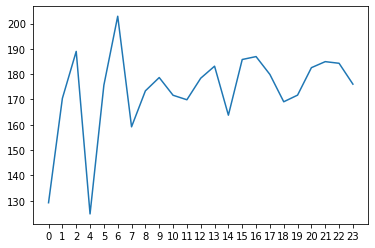

In [36]:
d1['time'] = d1['time'].apply(str)
plt.plot(d1['time'],d1['均单价'])

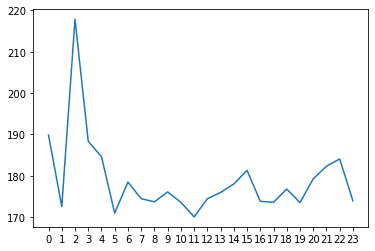

In [37]:
d2['time'] = d2['time'].apply(str)
plt.plot(d2['time'],d2['均单价'])

In [23]:
def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [24]:
a = drop_du(data,'商品分类')


In [25]:

order=sorted(a[1].items(),key=lambda x:x[1],reverse=True)
order

[('约惠七夕11枝\t', 6838),
 ('约惠七夕19枝\t', 4803),
 ('店长推荐づ——\t', 2128),
 ('活动专区づ———\t', 1960),
 ('约惠七夕33枝\t', 1878),
 ('折扣专区づ———\t', 703),
 ('热销专区づ———\t', 533),
 ('约惠七夕52枝\t', 526),
 ('生日快乐づ———\t', 492),
 ('约惠七夕99枝\t', 276),
 ('臻选高端づ———\t', 228),
 ('满天星星づ———\t', 225),
 ('向日葵花づ———\t', 165),
 ('蓝色爱恋づ———\t', 155),
 ('爱意表达づ———\t', 108),
 ('520专区づ——\t', 94),
 ('手提花篮づ———\t', 80),
 ('约会七夕11枝\t', 79),
 ('情动七夕11枝\t', 68),
 ('⒒枝专区づ———\t', 58),
 ('七夕热销专区\t', 49),
 ('毕业季花づ———\t', 46),
 ('送长辈们づ———\t', 44),
 ('原创花束づ———\t', 39),
 ('活动专区\t', 37),
 ('开业花篮づ———\t', 27),
 ('店长推荐1\t', 25),
 ('小花束专区\t', 24),
 ('家居鲜花\t', 23),
 ('节日专区づ———>毕业季区づ———\t', 19),
 ('节日专区づ———>教师节区づ———\t', 17),
 ('情动七夕19枝\t', 16),
 ('鲜花礼盒\t', 15),
 ('【七夕浪漫专场】\t', 14),
 ('家居鲜花づ———\t', 13),
 ('向日葵系列\t', 12),
 ('约惠七夕11枝||七夕11枝玫瑰\t', 12),
 ('情人节礼物\t', 10),
 ('折扣专区\t', 10),
 ('店长推荐\t', 10),
 ('节日专区づ———>母亲节区づ———\t', 10),
 ('商品配物\t', 9),
 ('满天星星\t', 8),
 ('热销专区づ———||臻选高端づ———||约惠七夕33枝||高端大花づ———\t', 7),
 ('节日专区づ———>圣诞节区づ———\t', 7),
 ('七夕爆款专场\t', 6),

In [26]:
b = wenzi(data,'礼盒','商品名称')

关于“礼盒”的订单数量是： 10228


In [27]:
b =wenzi(data,'11','商品名称')

关于“11”的订单数量是： 11032


In [28]:
b =wenzi(data,'19','商品名称')

关于“19”的订单数量是： 5824


In [29]:
b =wenzi(data,'36','商品名称')

关于“36”的订单数量是： 1


In [30]:
b =wenzi(data,'粉玫瑰','商品名称')

关于“粉玫瑰”的订单数量是： 4920


In [31]:
b =wenzi(data,'红玫瑰','商品名称')

关于“红玫瑰”的订单数量是： 13188


In [32]:
b =wenzi(data,'花束','商品名称')

关于“花束”的订单数量是： 10564
